# 07_2.Own-Way ANOVA(연습문제2)
- https://pingouin-stats.org/build/html/generated/pingouin.anova.html#pingouin.anova

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기(github)

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [33]:
# 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)
owa_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/07_3.Education.csv', encoding="cp949")
owa_df.head()

,학과,학년,교양만족도,전공만족도,비교과만족도,전체만족도
0,1,1,47.6,40.5,40.0,46.7
1,1,1,33.3,35.7,33.3,33.6
2,1,1,50.0,52.4,50.0,50.4
3,1,1,35.7,28.5,40.0,36.1
4,1,1,54.7,92.8,43.3,56.2


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [34]:
owa_df['학과'].replace({1:'빅경', 2:'사복', 3:'간호', 4:'음악'}, inplace=True)
owa_df['학년'].replace({1:'1학년', 2:'2학년', 3:'3학년', 4:'4학년'}, inplace=True)
owa_df['학과'] = owa_df['학과'].astype('category')
owa_df['학년'] = owa_df['학년'].astype('category')
owa_df.head()

,학과,학년,교양만족도,전공만족도,비교과만족도,전체만족도
0,빅경,1학년,47.6,40.5,40.0,46.7
1,빅경,1학년,33.3,35.7,33.3,33.6
2,빅경,1학년,50.0,52.4,50.0,50.4
3,빅경,1학년,35.7,28.5,40.0,36.1
4,빅경,1학년,54.7,92.8,43.3,56.2


### 2.3 자료구조 살펴보기

In [35]:
owa_df.shape

(286, 6)

In [36]:
owa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   학과      286 non-null    category
 1   학년      286 non-null    category
 2   교양만족도   286 non-null    float64 
 3   전공만족도   286 non-null    float64 
 4   비교과만족도  286 non-null    float64 
 5   전체만족도   286 non-null    float64 
dtypes: category(2), float64(4)
memory usage: 10.0 KB


In [37]:
owa_df.columns

Index(['학과', '학년', '교양만족도', '전공만족도', '비교과만족도', '전체만족도'], dtype='object')

## 3.기술통계

In [38]:
# 분석변수가 여러개 일 때
num_feature = ['교양만족도', '전공만족도', '비교과만족도', '전체만족도']
for num in num_feature:
    print("----", num, "----")
    results = owa_df.groupby('학과')[num].describe().round(3)
    print(results, "\n")

---- 교양만족도 ----
    count    mean     std   min   25%   50%     75%   max
학과                                                       
간호   92.0  47.841  15.248  16.6  39.3  47.6  52.325  85.7
빅경   36.0  50.889  19.863  14.8  38.1  47.0  64.300  83.3
사복   65.0  52.742  18.359  14.8  42.9  50.0  64.200  83.3
음악   93.0  50.529  16.029  14.4  42.9  50.0  57.100  83.3 

---- 전공만족도 ----
    count    mean     std   min     25%   50%    75%    max
학과                                                         
간호   92.0  54.990  18.360  21.4  44.625  50.0  67.20  100.0
빅경   36.0  54.114  25.614  23.8  32.125  48.8  71.15  100.0
사복   65.0  55.066  17.394  21.4  47.600  53.6  64.20   95.2
음악   93.0  59.259  20.179  21.4  50.000  57.1  71.40  100.0 

---- 비교과만족도 ----
    count    mean     std   min   25%    50%    75%   max
학과                                                       
간호   92.0  46.178  16.068  20.0  35.0  48.25  53.30  83.3
빅경   36.0  52.303  16.205  33.3  40.0  48.35  56.25  83.3
사복   65

In [39]:
# 분석변수가 여러개 일 때
num_feature = ['교양만족도', '전공만족도', '비교과만족도', '전체만족도']
for num in num_feature:
    print("----", num, "----")
    results = owa_df.groupby('학년')[num].describe().round(3)
    print(results, "\n")

---- 교양만족도 ----
     count    mean     std   min     25%   50%    75%   max
학년                                                         
1학년   50.0  45.908  14.719  16.7  39.300  46.4  50.00  85.7
2학년   97.0  49.334  17.766  14.4  39.300  50.0  57.10  83.3
3학년   67.0  54.872  15.997  21.4  47.600  52.3  64.25  83.3
4학년   72.0  50.050  17.145  14.8  39.825  50.0  61.90  83.3 

---- 전공만족도 ----
     count    mean     std   min   25%   50%   75%    max
학년                                                       
1학년   50.0  53.806  19.406  21.4  46.4  50.0  62.5  100.0
2학년   97.0  56.853  20.044  21.4  42.9  50.0  69.0  100.0
3학년   67.0  59.379  20.151  21.4  48.8  57.1  71.4  100.0
4학년   72.0  54.364  19.368  21.4  42.8  50.0  66.6   97.6 

---- 비교과만족도 ----
     count    mean     std   min     25%    50%   75%   max
학년                                                         
1학년   50.0  41.328  14.121  20.0  30.825  41.65  50.0  83.3
2학년   97.0  46.667  18.225  20.0  35.000  46.60  56.6  83.3

## 6.정규성 검정
- 잔차의 정규성을 검정해야 함
- pg 모형는 잔차가 없어서 statsmodels를 이용해야 함

### 6.1 정규분포 검정



In [58]:
# 잔차의 정규성을 검정한 결과 잔차는 정규분포로 나타남
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('교양만족도 ~ C(학과)', data = owa_df)
result = model.fit()
pg.normality(result.resid).round(3)

,W,pval,normal
0,0.967,0.0,False


In [59]:
model = ols('전공만족도 ~ C(학과)', data = owa_df)
result = model.fit()
pg.normality(result.resid).round(3)

,W,pval,normal
0,0.968,0.0,False


In [60]:
model = ols('비교과만족도 ~ C(학과)', data = owa_df)
result = model.fit()
pg.normality(result.resid).round(3)

,W,pval,normal
0,0.967,0.0,False


In [61]:
model = ols('전체만족도 ~ C(학과)', data = owa_df)
result = model.fit()
pg.normality(result.resid).round(3)

,W,pval,normal
0,0.976,0.0,False


In [63]:
# 잔차의 정규성을 검정한 결과 잔차는 정규분포로 나타남
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('교양만족도 ~ C(학년)', data = owa_df)
result = model.fit()
pg.normality(result.resid).round(3)

,W,pval,normal
0,0.971,0.0,False


In [64]:
model = ols('전공만족도 ~ C(학년)', data = owa_df)
result = model.fit()
pg.normality(result.resid).round(3)

,W,pval,normal
0,0.968,0.0,False


In [65]:
model = ols('비교과만족도 ~ C(학년)', data = owa_df)
result = model.fit()
pg.normality(result.resid).round(3)

,W,pval,normal
0,0.979,0.0,False


In [66]:
model = ols('전체만족도 ~ C(학년)', data = owa_df)
result = model.fit()
pg.normality(result.resid).round(3)

,W,pval,normal
0,0.983,0.002,False


### 6.2 비모수일때(Kruskal Wallis)

#### 6.2.1 Kruskal Wallis

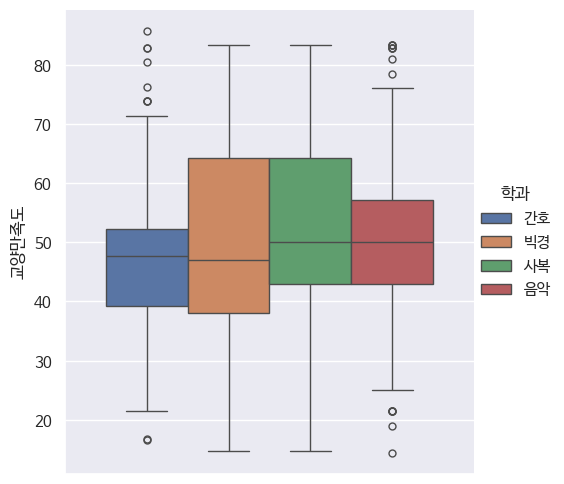

In [62]:
# 이상치 검정 그래프
sns.catplot(data = owa_df,
            y = owa_df["교양만족도"],
            hue = owa_df["학과"],
            kind = "box")
plt.show()

In [68]:
# Kruskal Wallis
pg.kruskal(dv = '교양만족도',
           between = '학과',
           data = owa_df).round(3)

,Source,ddof1,H,p-unc
Kruskal,학과,3,5.115,0.164


In [69]:
# Kruskal Wallis
pg.kruskal(dv = '전공만족도',
           between = '학과',
           data = owa_df).round(3)

,Source,ddof1,H,p-unc
Kruskal,학과,3,4.766,0.19


In [78]:
# Kruskal Wallis
pg.kruskal(dv = '비교과만족도',
           between = '학과',
           data = owa_df).round(3)

,Source,ddof1,H,p-unc
Kruskal,학과,3,1.936,0.586


In [71]:
# Kruskal Wallis
pg.kruskal(dv = '전체만족도',
           between = '학과',
           data = owa_df).round(3)

,Source,ddof1,H,p-unc
Kruskal,학과,3,0.086,0.993


In [72]:
# Kruskal Wallis
pg.kruskal(dv = '교양만족도',
           between = '학년',
           data = owa_df).round(3)

,Source,ddof1,H,p-unc
Kruskal,학년,3,11.129,0.011


In [73]:
# Kruskal Wallis
pg.kruskal(dv = '전공만족도',
           between = '학년',
           data = owa_df).round(3)

,Source,ddof1,H,p-unc
Kruskal,학년,3,3.799,0.284


In [74]:
# Kruskal Wallis
pg.kruskal(dv = '비교과만족도',
           between = '학년',
           data = owa_df).round(3)

,Source,ddof1,H,p-unc
Kruskal,학년,3,13.148,0.004


In [75]:
# Kruskal Wallis
pg.kruskal(dv = '전체만족도',
           between = '학년',
           data = owa_df).round(3)

,Source,ddof1,H,p-unc
Kruskal,학년,3,6.026,0.11


#### 6.2.2 비모수 사후분석(post-hoc, Multicom)

In [76]:
# 비모수 post-hoc test: LSD
pg.pairwise_tests(data = owa_df,
                   dv = '교양만족도',
                   between = '학년',
                   parametric = False).round(3)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,학년,1학년,2학년,False,False,2152.0,two-sided,0.262,-0.203
1,학년,1학년,3학년,False,False,1051.0,two-sided,0.001,-0.576
2,학년,1학년,4학년,False,False,1487.0,two-sided,0.102,-0.254
3,학년,2학년,3학년,False,False,2564.5,two-sided,0.022,-0.323
4,학년,2학년,4학년,False,False,3342.5,two-sided,0.635,-0.041
5,학년,3학년,4학년,False,False,2798.0,two-sided,0.103,0.289


In [79]:
# 비모수 post-hoc test: LSD
pg.pairwise_tests(data = owa_df,
                   dv = '비교과만족도',
                   between = '학년',
                   parametric = False).round(3)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,학년,1학년,2학년,False,False,2029.0,two-sided,0.104,-0.313
1,학년,1학년,3학년,False,False,1020.5,two-sided,0.000,-0.688
2,학년,1학년,4학년,False,False,1308.5,two-sided,0.010,-0.425
3,학년,2학년,3학년,False,False,2634.0,two-sided,0.039,-0.305
4,학년,2학년,4학년,False,False,3230.0,two-sided,0.404,-0.069
5,학년,3학년,4학년,False,False,2697.0,two-sided,0.228,0.255
